In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

dataset = pd.read_csv("Student Info.csv")

In [3]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


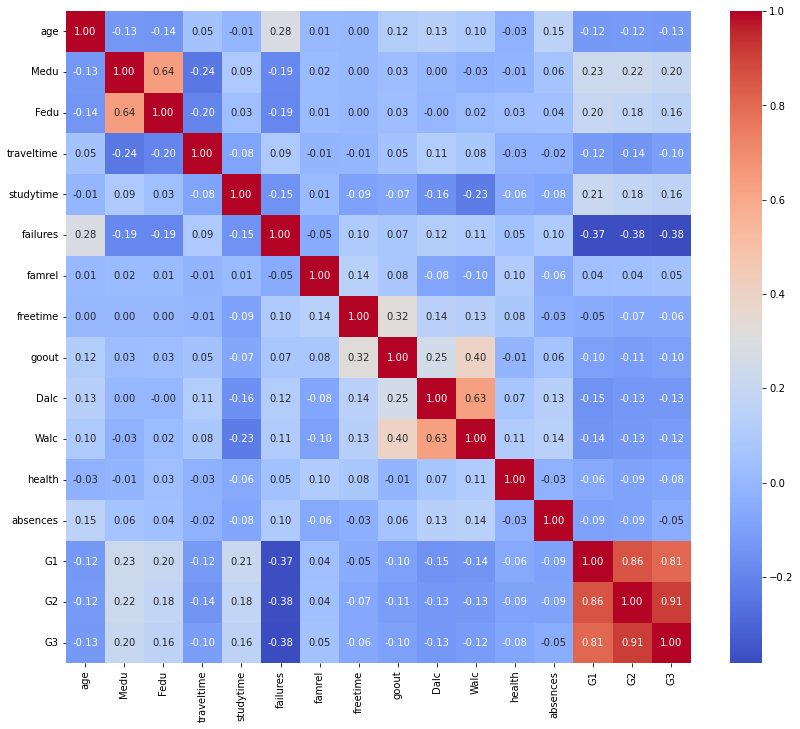

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Create the heatmap
plt.figure(figsize=(14,12))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Display the heatmap
plt.show()


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [6]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
import pandas as pd

# Assuming you've already loaded the dataset into a DataFrame named 'dataset'

# Define the weightage percentages
weightage_G1 = 0.25
weightage_G2 = 0.25
weightage_G3 = 0.5

# Create the new column 'final_marks'
dataset['final_marks'] = (
    dataset['G1'] * weightage_G1 +
    dataset['G2'] * weightage_G2 +
    dataset['G3'] * weightage_G3
)

# Now 'final_marks' column contains the combined and weighted marks for G1, G2, and G3


In [8]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_marks
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.75
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.50
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.75
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.75
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,10.25
1040,SLA,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,15.50
1041,SLA,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,10.25
1042,SLA,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,10.00


In [9]:
# Assuming you've already loaded the dataset into a DataFrame named 'dataset'

# Find the maximum value in the 'final_marks' column
max_final_marks = dataset['final_marks'].max()

# Print the maximum value
print(f"The maximum value in the 'final_marks' column is: {max_final_marks}")


The maximum value in the 'final_marks' column is: 19.5


In [10]:
# Assuming you've already loaded the dataset into a DataFrame named 'dataset'

# Find the maximum value in the 'final_marks' column
min_final_marks = dataset['final_marks'].min()

# Print the maximum value
print(f"The maximum value in the 'final_marks' column is: {min_final_marks}")


The maximum value in the 'final_marks' column is: 1.0


In [11]:
# Assuming you've already loaded the dataset into a DataFrame named 'dataset'
total_marks = 20
# Calculate the percentage for the 'final_marks' column
# total_marks = dataset['final_marks'].sum()
print(total_marks)
dataset['percentage'] = (dataset['final_marks'] / total_marks) * 100

# Print the DataFrame with the new 'percentage' column
print(dataset[['final_marks', 'percentage']])


20
      final_marks  percentage
0            5.75       28.75
1            5.50       27.50
2            8.75       43.75
3           14.75       73.75
4            9.00       45.00
...           ...         ...
1039        10.25       51.25
1040        15.50       77.50
1041        10.25       51.25
1042        10.00       50.00
1043        10.75       53.75

[1044 rows x 2 columns]


In [12]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,final_marks,percentage
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.75,28.75
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.50,27.50
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.75,43.75
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.75,73.75
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,9.00,45.00


In [13]:
# Create a new 'Result' column based on the 'percentage' column
dataset['Result'] = ['Pass' if percentage >= 40 else 'Fail' for percentage in dataset['percentage']]

In [14]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,final_marks,percentage,Result
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.75,28.75,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,5.50,27.50,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,8.75,43.75,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14.75,73.75,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,9.00,45.00,Pass


In [15]:
dataset["Result"]

0       Fail
1       Fail
2       Pass
3       Pass
4       Pass
        ... 
1039    Pass
1040    Pass
1041    Pass
1042    Pass
1043    Pass
Name: Result, Length: 1044, dtype: object

In [16]:
# Create a new 'Result_binary' column
dataset['Result_binary'] = dataset['Result'].apply(lambda x: 1 if x == 'Pass' else 0)

In [17]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,final_marks,percentage,Result,Result_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,5.75,28.75,Fail,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5.50,27.50,Fail,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,8.75,43.75,Pass,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,14.75,73.75,Pass,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,9.00,45.00,Pass,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,19,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,10.25,51.25,Pass,1
1040,SLA,F,18,U,LE3,T,3,1,teacher,services,...,1,1,4,15,15,16,15.50,77.50,Pass,1
1041,SLA,F,18,U,GT3,T,1,1,other,other,...,1,5,6,11,12,9,10.25,51.25,Pass,1
1042,SLA,M,17,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,10.00,50.00,Pass,1


In [18]:
### Age column - 15-22
####  the distribution of final grades for students in the specified age category.

In [19]:
def age(age):
    new_age=[]
    for i in age:
        if(i < 17):
            i=0
        elif (i < 19):
            i=1
        else:
            i=2
        new_age.append(i)
    return new_age

In [20]:
dataset['age']=age(dataset['age'])

In [21]:
dataset['age']

0       1
1       1
2       0
3       0
4       0
       ..
1039    2
1040    1
1041    1
1042    1
1043    1
Name: age, Length: 1044, dtype: int64

In [22]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,final_marks,percentage,Result,Result_binary
0,GP,F,1,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,5.75,28.75,Fail,0
1,GP,F,1,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5.50,27.50,Fail,0
2,GP,F,0,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,8.75,43.75,Pass,1
3,GP,F,0,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,14.75,73.75,Pass,1
4,GP,F,0,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,9.00,45.00,Pass,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,2,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,10.25,51.25,Pass,1
1040,SLA,F,1,U,LE3,T,3,1,teacher,services,...,1,1,4,15,15,16,15.50,77.50,Pass,1
1041,SLA,F,1,U,GT3,T,1,1,other,other,...,1,5,6,11,12,9,10.25,51.25,Pass,1
1042,SLA,M,1,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,10.00,50.00,Pass,1


In [23]:
import pandas as pd
import scipy.stats as stats

# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['age'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 8.057925665933181
p-value: 0.017792774466095024
Degrees of freedom: 2
Expected frequencies table:
[[ 58.69252874 416.30747126]
 [ 61.65804598 437.34195402]
 [  8.64942529  61.35057471]]


Here the p-value: 0.017792774466095024 that is less than 0.05.So there is correlation between the variables.

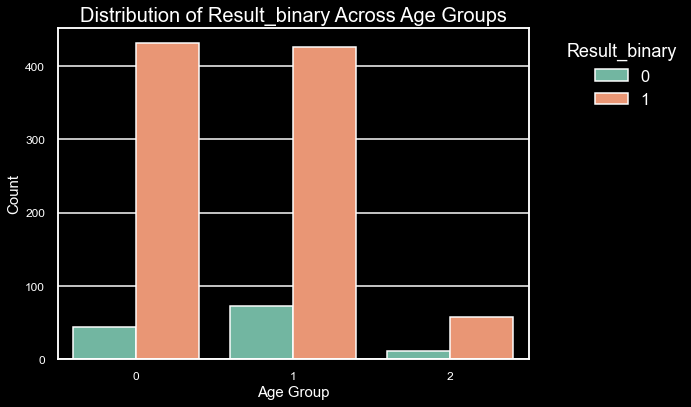

In [24]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across Age Groups', color='white', size=20)
plt.xlabel('Age Group', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [25]:
# # Plotting correlation matrix
# correlation_matrix = dataset[['age', 'Result_binary']].corr()

# # Plotting the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap between Age Category and Result_binary')
# plt.show()

In [26]:
### Sex

In [27]:
dataset['sex'].value_counts()

F    591
M    453
Name: sex, dtype: int64

In [28]:
import scipy.stats as stats

# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['sex'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
[[ 73.02586207 517.97413793]
 [ 55.97413793 397.02586207]]


Here the p value is 1 that is ther is no correlation between two categorical variables. So we can drop it.


In [29]:
# dataset['sex'] = pd.get_dummies(dataset['sex'],drop_first=True)

In [30]:
dataset['address'].value_counts()

U    759
R    285
Name: address, dtype: int64

In [31]:
import scipy.stats as stats

# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['address'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 2.3648385436126516
p-value: 0.12409675194587183
Degrees of freedom: 1
Expected frequencies table:
[[ 35.21551724 249.78448276]
 [ 93.78448276 665.21551724]]


p-value: 0.12409675194587183 is greater than 0.05.no correlation .so we drop it

In [32]:
dataset['famsize'].value_counts()

GT3    738
LE3    306
Name: famsize, dtype: int64

In [33]:
import scipy.stats as stats

# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['famsize'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 5.460904666861024
p-value: 0.019446576013651365
Degrees of freedom: 1
Expected frequencies table:
[[ 91.18965517 646.81034483]
 [ 37.81034483 268.18965517]]


p-value: 0.019446576013651365 is less than 0.05 so ther is correlation

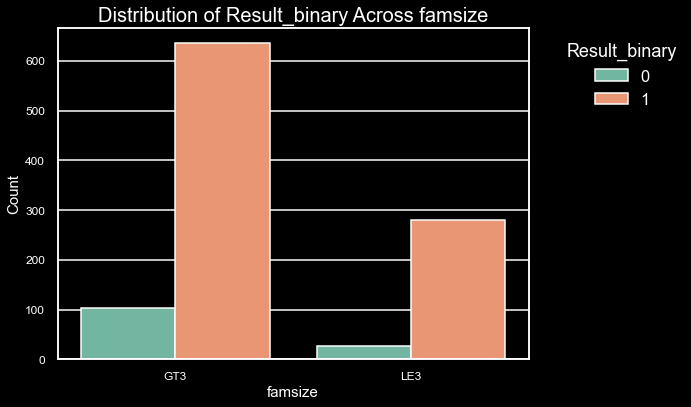

In [34]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='famsize', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across famsize', color='white', size=20)
plt.xlabel('famsize', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [35]:
dataset['Pstatus'].value_counts()

T    923
A    121
Name: Pstatus, dtype: int64

In [36]:


# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['Pstatus'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
[[ 14.95114943 106.04885057]
 [114.04885057 808.95114943]]


p-value: 1.0 greater than 0.05 .so no correlation.drop it

Mother education

In [37]:
dataset['Medu'].value_counts()

4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64

In [38]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['Medu'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 13.061932415475415
p-value: 0.010977112455111774
Degrees of freedom: 4
Expected frequencies table:
[[  1.11206897   7.88793103]
 [ 24.95977011 177.04022989]
 [ 35.70977011 253.29022989]
 [ 29.40804598 208.59195402]
 [ 37.81034483 268.18965517]]


p-value: 0.010977112455111774 is less than 0.05.so corelation exist

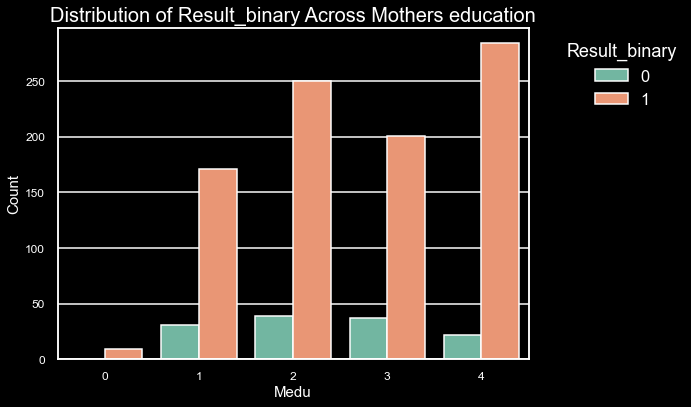

In [39]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Medu', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across Mothers education', color='white', size=20)
plt.xlabel('Medu', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [40]:
dataset['Fedu'].value_counts()

2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64

In [41]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['Fedu'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 13.334932607211485
p-value: 0.00975007714873123
Degrees of freedom: 4
Expected frequencies table:
[[  1.11206897   7.88793103]
 [ 31.63218391 224.36781609]
 [ 40.03448276 283.96551724]
 [ 28.54310345 202.45689655]
 [ 27.67816092 196.32183908]]


p-value: 0.00975007714873123 is less than 0.05.Correlation exist

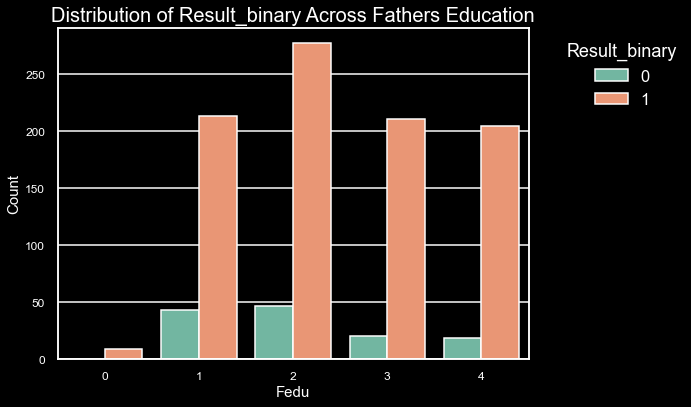

In [42]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Fedu', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across Fathers Education', color='white', size=20)
plt.xlabel('Fedu', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [43]:
dataset['Mjob'].value_counts()

other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64

In [44]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['Mjob'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 13.697617403014695
p-value: 0.00832537716531303
Degrees of freedom: 4
Expected frequencies table:
[[ 23.97126437 170.02873563]
 [ 10.13218391  71.86781609]
 [ 49.30172414 349.69827586]
 [ 29.5316092  209.4683908 ]
 [ 16.06321839 113.93678161]]


p-value: 0.00975007714873123 is less than 0.05.so correlation exist

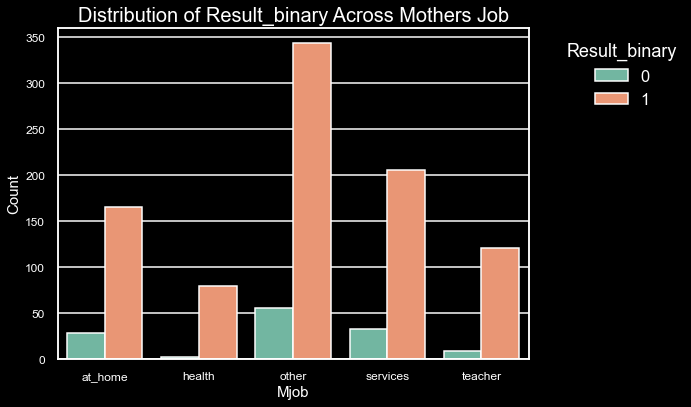

In [45]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Mjob', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across Mothers Job', color='white', size=20)
plt.xlabel('Mjob', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [46]:
dataset['Fjob'].value_counts()

other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64

In [47]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['Fjob'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 2.2708405494694954
p-value: 0.6860829107321944
Degrees of freedom: 4
Expected frequencies table:
[[  7.66091954  54.33908046]
 [  5.06609195  35.93390805]
 [ 72.16091954 511.83908046]
 [ 36.08045977 255.91954023]
 [  8.0316092   56.9683908 ]]


In [48]:
#drop

In [49]:
dataset['reason'].value_counts()

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

In [50]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['reason'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 6.45490091546905
p-value: 0.09145816969074357
Degrees of freedom: 3
Expected frequencies table:
[[ 53.13218391 376.86781609]
 [ 31.87931034 226.12068966]
 [ 13.34482759  94.65517241]
 [ 30.64367816 217.35632184]]


p-value: 0.09145816969074357 is greater than 0.05 so no correlation.drop it

In [51]:
dataset['guardian'].value_counts()

mother    728
father    243
other      73
Name: guardian, dtype: int64

In [52]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['guardian'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 1.2889467577281917
p-value: 0.5249389132555404
Degrees of freedom: 2
Expected frequencies table:
[[ 30.02586207 212.97413793]
 [ 89.95402299 638.04597701]
 [  9.02011494  63.97988506]]


p-value: 0.5249389132555404 is greater than 0.05 then no correlation .drop it

In [53]:
dataset['traveltime'].value_counts()

1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64

In [54]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['traveltime'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 1.1956641188725556
p-value: 0.7540444218582769
Degrees of freedom: 3
Expected frequencies table:
[[ 76.97988506 546.02011494]
 [ 39.54022989 280.45977011]
 [  9.51436782  67.48563218]
 [  2.96551724  21.03448276]]


p-value: 0.7540444218582769 is greater than 0.05.so no correlation.drop it

In [55]:
dataset['studytime'].value_counts()

2    503
1    317
3    162
4     62
Name: studytime, dtype: int64

In [56]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['studytime'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 10.207902564596772
p-value: 0.01687909579302544
Degrees of freedom: 3
Expected frequencies table:
[[ 39.16954023 277.83045977]
 [ 62.15229885 440.84770115]
 [ 20.01724138 141.98275862]
 [  7.66091954  54.33908046]]


p-value: 0.01687909579302544 is less than 0.05.So correlation exist

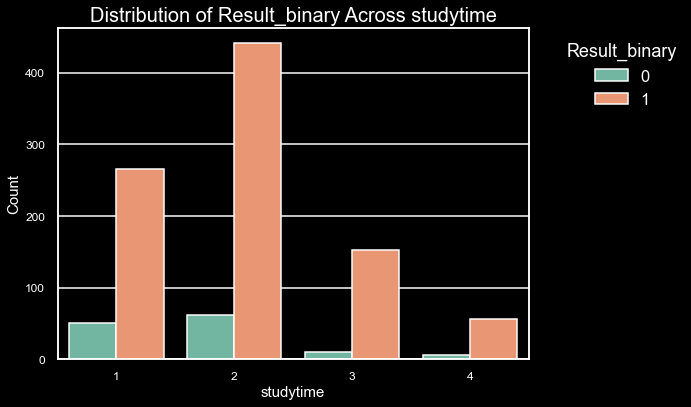

In [57]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='studytime', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across studytime', color='white', size=20)
plt.xlabel('studytime', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [58]:
dataset['failures'].value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

In [59]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['failures'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 130.5320134948135
p-value: 4.153571486288998e-28
Degrees of freedom: 3
Expected frequencies table:
[[106.38793103 754.61206897]
 [ 14.82758621 105.17241379]
 [  4.07758621  28.92241379]
 [  3.70689655  26.29310345]]


p-value: 4.153571486288998e-28 is less than 0.05.so high correlation.

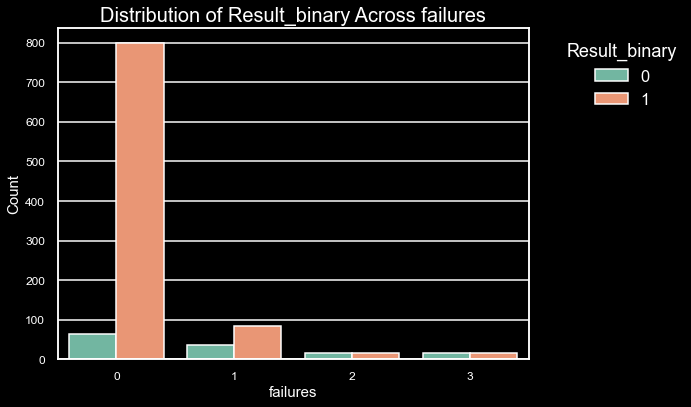

In [60]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='failures', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across failures', color='white', size=20)
plt.xlabel('failures', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [61]:
dataset['schoolsup'].value_counts()

no     925
yes    119
Name: schoolsup, dtype: int64

In [62]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['schoolsup'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.05548850803471722
p-value: 0.813774124564084
Degrees of freedom: 1
Expected frequencies table:
[[114.29597701 810.70402299]
 [ 14.70402299 104.29597701]]


p-value: 0.813774124564084 is greater than 0.05.no correlation.drop it

In [63]:
dataset['famsup'].value_counts()


yes    640
no     404
Name: famsup, dtype: int64

In [64]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['famsup'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
[[ 49.91954023 354.08045977]
 [ 79.08045977 560.91954023]]


p-value: 1.0 is greater than 0.05.no correlation.drop

In [65]:
dataset['activities'].value_counts()

no     528
yes    516
Name: activities, dtype: int64

In [66]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['activities'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 1.3860035109806819
p-value: 0.2390811720485514
Degrees of freedom: 1
Expected frequencies table:
[[ 65.24137931 462.75862069]
 [ 63.75862069 452.24137931]]


p-value: 0.2390811720485514 is greater than 0.05.no correlation.drop 

In [67]:
dataset['higher'].value_counts()

yes    955
no      89
Name: higher, dtype: int64

In [68]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['higher'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 38.83074077713121
p-value: 4.6219155741995734e-10
Degrees of freedom: 1
Expected frequencies table:
[[ 10.99712644  78.00287356]
 [118.00287356 836.99712644]]


p-value: 4.6219155741995734e-10 is small than 0.05.then correlation exist.

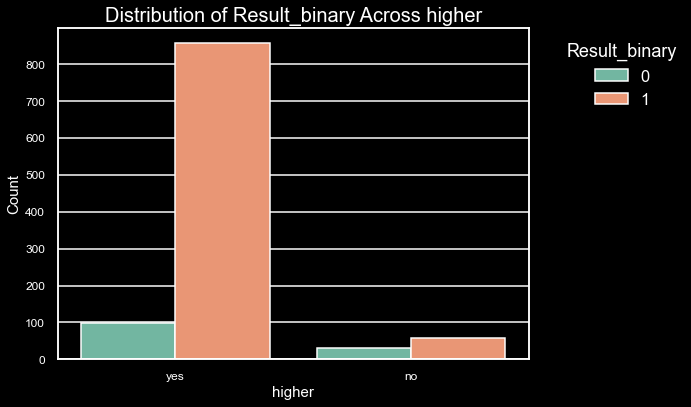

In [69]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='higher', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across higher', color='white', size=20)
plt.xlabel('higher', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [70]:
dataset['health'].value_counts()

5    395
3    215
4    174
1    137
2    123
Name: health, dtype: int64

In [71]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['health'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.6900304593111153
p-value: 0.9525526542069399
Degrees of freedom: 4
Expected frequencies table:
[[ 16.92816092 120.07183908]
 [ 15.19827586 107.80172414]
 [ 26.56609195 188.43390805]
 [ 21.5        152.5       ]
 [ 48.80747126 346.19252874]]


p-value: 0.9525526542069399 is greater than 0.05 then no correlation.drop it

In [72]:
dataset['freetime'].value_counts()

3    408
4    293
2    171
5    108
1     64
Name: freetime, dtype: int64

In [73]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['freetime'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 4.077426927207981
p-value: 0.3956286577917537
Degrees of freedom: 4
Expected frequencies table:
[[  7.90804598  56.09195402]
 [ 21.12931034 149.87068966]
 [ 50.4137931  357.5862069 ]
 [ 36.20402299 256.79597701]
 [ 13.34482759  94.65517241]]


p-value: 0.3956286577917537 is greater than 0.05.no correlation drop

In [74]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['Dalc'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 12.370274071151348
p-value: 0.014800083685928257
Degrees of freedom: 4
Expected frequencies table:
[[ 89.83045977 637.16954023]
 [ 24.2183908  171.7816092 ]
 [  8.52586207  60.47413793]
 [  3.21264368  22.78735632]
 [  3.21264368  22.78735632]]


p-value: 0.014800083685928257 is less than 0.05.Correlation exist

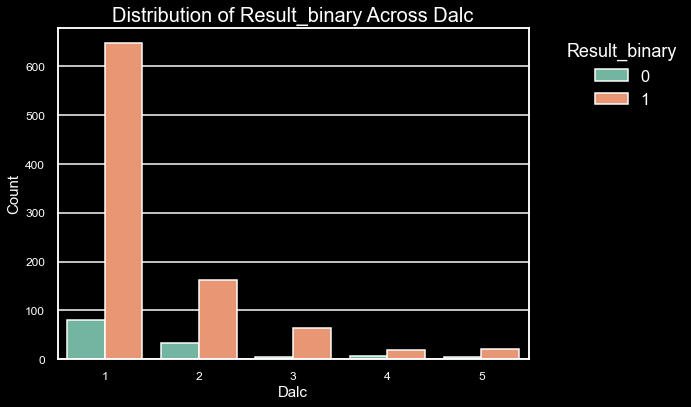

In [75]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Dalc', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across Dalc', color='white', size=20)
plt.xlabel('Dalc', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [76]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['Walc'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 5.739153646355707
p-value: 0.219493717195618
Degrees of freedom: 4
Expected frequencies table:
[[ 49.17816092 348.82183908]
 [ 29.03735632 205.96264368]
 [ 24.71264368 175.28735632]
 [ 17.05172414 120.94827586]
 [  9.02011494  63.97988506]]


p-value: 0.219493717195618 greater than 0.05.no correlation drop it

In [77]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['romantic'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 2.264319239143693
p-value: 0.13238437401040629
Degrees of freedom: 1
Expected frequencies table:
[[ 83.15804598 589.84195402]
 [ 45.84195402 325.15804598]]


p-value: 0.13238437401040629 is greater than 0.05 .no correlation.drop it

In [78]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['goout'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 14.887337142231228
p-value: 0.004940683030172216
Degrees of freedom: 4
Expected frequencies table:
[[  8.77298851  62.22701149]
 [ 30.64367816 217.35632184]
 [ 41.39367816 293.60632184]
 [ 28.04885057 198.95114943]
 [ 20.1408046  142.8591954 ]]


p-value: 0.004940683030172216 is less than 0.05.correlation exist.

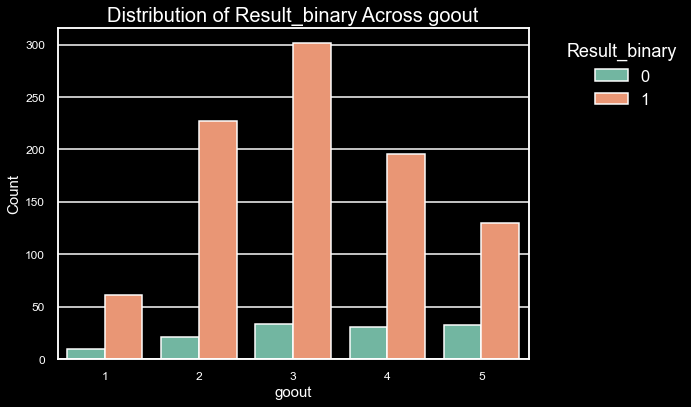

In [79]:
# Updating the code to use a more appealing color palette for the plot.

# Set the aesthetic style of the plots with a black background
sns.set(style="darkgrid")

# Set a context to "talk" for larger fonts, appropriate for presentations or large displays
sns.set_context("talk")

# Define a vibrant color palette using seaborn's built-in palettes
# 'Set2' is known for having visually distinct colors that are pleasing to the eye.
palette = sns.color_palette("Set2")

# Create the bar plot again with the new vibrant color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='goout', hue='Result_binary', data=dataset, palette=palette, dodge=True)

# Set the background color of the figure and axes for better contrast
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize the plot to make it more visually appealing
plt.title('Distribution of Result_binary Across goout', color='white', size=20)
plt.xlabel('goout', color='white', size=15)
plt.ylabel('Count', color='white', size=15)
plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

# Modify legend appearance and place it outside the plot area
legend = plt.legend(title='Result_binary', frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
legend.get_frame().set_color('black')

# Adjust the layout to make room for the legend outside the plot area
plt.tight_layout()

# Show the plot with the new vibrant color palette
plt.show()


In [80]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['famrel'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 5.045753715744427
p-value: 0.2826350151331185
Degrees of freedom: 4
Expected frequencies table:
[[  3.70689655  26.29310345]
 [  5.80747126  41.19252874]
 [ 20.88218391 148.11781609]
 [ 63.26436782 448.73563218]
 [ 35.33908046 250.66091954]]


p-value: 0.2826350151331185 is greater than 0.05.no correlation .drop

In [81]:
# Assuming dataset is your DataFrame and it contains 'sex' and 'Result_binary' columns
cross_tab = pd.crosstab(dataset['school'], dataset['Result_binary'])

# Now you can run the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 61.06396813134494
p-value: 3.4826152383357335e-13
Degrees of freedom: 3
Expected frequencies table:
[[ 43.12356322 305.87643678]
 [ 59.92816092 425.07183908]
 [  5.68390805  40.31609195]
 [ 20.26436782 143.73563218]]


In [82]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'final_marks',
       'percentage', 'Result', 'Result_binary'],
      dtype='object')

In [83]:
# Assuming df is your DataFrame
dataset_copy = dataset.copy()


In [84]:
dataset_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,final_marks,percentage,Result,Result_binary
0,GP,F,1,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,5.75,28.75,Fail,0
1,GP,F,1,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5.50,27.50,Fail,0
2,GP,F,0,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,8.75,43.75,Pass,1
3,GP,F,0,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,14.75,73.75,Pass,1
4,GP,F,0,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,9.00,45.00,Pass,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,2,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,10.25,51.25,Pass,1
1040,SLA,F,1,U,LE3,T,3,1,teacher,services,...,1,1,4,15,15,16,15.50,77.50,Pass,1
1041,SLA,F,1,U,GT3,T,1,1,other,other,...,1,5,6,11,12,9,10.25,51.25,Pass,1
1042,SLA,M,1,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,10.00,50.00,Pass,1


In [85]:
# Assuming df is your DataFrame and cols_to_drop is a list of columns to drop
cols_to_drop = ['sex', 'address', 'school','Pstatus','reason','guardian','traveltime','schoolsup','famsup','activities','health','Walc','freetime','romantic','famrel','G1','G2', 'G3']

# Drop the specified columns
dataset_copy.drop(cols_to_drop, axis=1, inplace=True)

# If you don't want to modify the original DataFrame and create a new one instead
# new_df = df.drop(cols_to_drop, axis=1)


In [86]:
# Assuming df is your DataFrame
column_names = dataset_copy.columns
print(column_names)
dataset_copy.head()

Index(['age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime',
       'failures', 'paid', 'nursery', 'higher', 'internet', 'goout', 'Dalc',
       'absences', 'final_marks', 'percentage', 'Result', 'Result_binary'],
      dtype='object')


,age,famsize,Medu,Fedu,Mjob,Fjob,studytime,failures,paid,nursery,higher,internet,goout,Dalc,absences,final_marks,percentage,Result,Result_binary
0,1,GT3,4,4,at_home,teacher,2,0,no,yes,yes,no,4,1,6,5.75,28.75,Fail,0
1,1,GT3,1,1,at_home,other,2,0,no,no,yes,yes,3,1,4,5.50,27.50,Fail,0
2,0,LE3,1,1,at_home,other,2,3,yes,yes,yes,yes,2,2,10,8.75,43.75,Pass,1
3,0,GT3,4,2,health,services,3,0,yes,yes,yes,yes,2,1,2,14.75,73.75,Pass,1
4,0,GT3,3,3,other,other,2,0,yes,yes,yes,no,2,1,4,9.00,45.00,Pass,1


In [87]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be label-encoded
columns_to_label_encode = ['famsize', 'paid', 'higher', 'internet', 'nursery',"Mjob","Fjob"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_label_encode:
    dataset_copy[column] = label_encoder.fit_transform(dataset_copy[column])

# Display the first few rows of the DataFrame with label encoding
# print(dataset_copy.head())
dataset_copy

,age,famsize,Medu,Fedu,Mjob,Fjob,studytime,failures,paid,nursery,higher,internet,goout,Dalc,absences,final_marks,percentage,Result,Result_binary
0,1,0,4,4,0,4,2,0,0,1,1,0,4,1,6,5.75,28.75,Fail,0
1,1,0,1,1,0,2,2,0,0,0,1,1,3,1,4,5.50,27.50,Fail,0
2,0,1,1,1,0,2,2,3,1,1,1,1,2,2,10,8.75,43.75,Pass,1
3,0,0,4,2,1,3,3,0,1,1,1,1,2,1,2,14.75,73.75,Pass,1
4,0,0,3,3,2,2,2,0,1,1,1,0,2,1,4,9.00,45.00,Pass,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,2,0,2,3,3,2,3,1,0,0,1,1,2,1,4,10.25,51.25,Pass,1
1040,1,1,3,1,4,3,2,0,0,1,1,1,4,1,4,15.50,77.50,Pass,1
1041,1,0,1,1,2,2,2,0,0,1,1,0,1,1,6,10.25,51.25,Pass,1
1042,1,1,3,1,3,3,1,0,0,0,1,1,5,3,6,10.00,50.00,Pass,1


In [88]:
from sklearn.model_selection import train_test_split

# Assuming df_por is your DataFrame
# Drop the target variable 'G3' from the features
X = dataset_copy.drop(['Result_binary','Result',"final_marks","percentage"], axis=1)

# Set the target variable to 'G3'
y = dataset_copy['Result_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.87

Confusion Matrix:
[[  9  39]
 [  7 290]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.19      0.28        48
           1       0.88      0.98      0.93       297

    accuracy                           0.87       345
   macro avg       0.72      0.58      0.60       345
weighted avg       0.84      0.87      0.84       345



In [90]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [91]:
model_dt.score(X_test,y_test)

0.8028985507246377

In [92]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [93]:
model_svc.score(X_test,y_test)

0.8608695652173913

In [94]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [95]:
import pickle

# Replace 'your_model' with the variable name of your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)